1. Definición del Objetivo

2. Contexto Comercial

Las calificaciones crediticias corporativas, proporcionan una evaluación sobre la solvencia crediticia de una empresa y actúan como un indicador financiero fundamental para los potenciales inversionistas. 

Estas ayudan a entregar a los futuros accionistas una idea concreta sobre el riesgo asociado a la inversión en una empresa en particular, a través de los rendimientos de las inversiones crediticias que posee la empresa. 

Toda empresa aspira a obtener una buena calificación crediticia con el objetivo de buscar más inversionistas y tasas de interés de deuda más bajos.

3. Problema Comercial

4. Data Acquisition

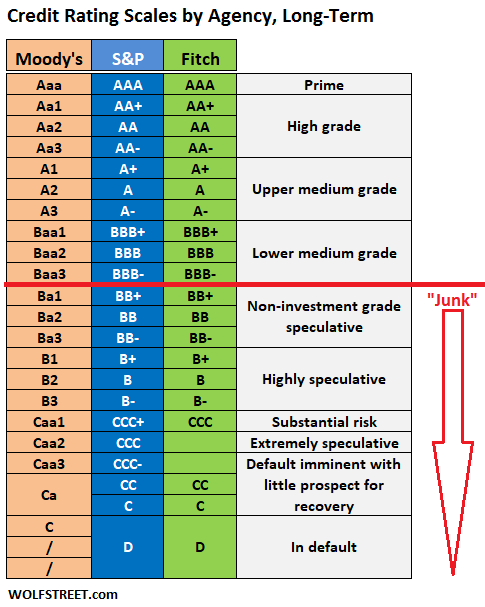

4.1 Importar Librerías

In [1]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn as sk
import bokeh as bk
import plotly as ply
import scipy as sci

4.2 Obtención Datos

In [2]:
# Fuente: https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-with-financial-ratios/data
url = 'https://raw.githubusercontent.com/jfdonosom/Data_Bases/main/Corporate_Credit_Rating_With_Financial_Ratios.csv'
df = pd.read_csv(url)
df.head(5)

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [3]:
df.shape

(7805, 25)

In [4]:
df.columns

Index(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker', 'Current Ratio',
       'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share'],
      dtype='object')

4.3 Descripción Variables

In [6]:
# Fuentes: https://finviz.com/help/screener.ashx , https://www.sec.gov/search-filings/standard-industrial-classification-sic-code-list ,  

# Corporation: Nombre de la Empresa.
# Rating: Calificación Otorgada por la Agencia Especialista - Calificación S&P Decreciente {AAA, AA+, AA, AA−, A+, A, A−, BBB+, BBB, BBB−, BB+, BB, BB−, B+, B, B−, CCC+, CCC, CCC−, CC, C, D}
# Rating Date: Fecha de Calificación.
# CIK: Identificador único de la Compañía provisto por el SEC (Security and Exchange Comission).
# Binary Rating: Calificación Binaria (1: Empresas con Grado de Inversión, 0: Empresas Basura) 
# SIC Code: Estándar Industrial de Clasificación (USA) - Indica el tipo de Negocio asociado a la Empresa.
# Sector: Grupos en función de las actividades de la Compañia en las cuales se agrupan diferentes Empresas. Relación Directa con el Código SIC.
# Ticker: Abreviación Empresa para Cotizar en Bolsa (Identificador Único)
# Current Ratio: Radio de Liquidez, que mide la capacidad de una empresa para pagar sus obligaciones en el corto plazo. Ratio Actual = Activos Actuales / Pasivos Actuales.
# Long-term Debt / Capital: Ratio que mide el Apalancamiento Financiero de una Compañía. Indica que proporción de las acciones y deuda la compañía está utilizando para financiar sus activos en el Largo Plazo. (Pasivos LP / Capital Accionistas)
# Debt/Equity Ratio (D/E): Ratio que mide el Apalancamiento Financiero de una Compañía. Indica que proporción de las acciones y deuda la compañía está utilizando para financiar sus activos en el Corto Plazo. (Pasivos Actuales / Capital Accionistas)                                              
# Gross Margin: Porcentaje del total de Ingresos por Ventas que la Compañía retiene después de incurrir en los costos directos de producción de un Bien o Servicio. Margen Bruto = (Ingresos Ventas - Costos Fijos Producción) / Ingresos Ventas 
# Operating Margin: Indica qué proporción de la ganancia de la compañía queda, luego de pagar los costos variables de producción, tales como salarios, insumos, etc. Margen Operacional = Ingresos Operacionales / Ingresos Totales Ventas. 
# EBIT Margin: Earnings Before Interest and Taxes. Ratio que nos indica la rentabilidad de una empresa. Se calcula como las ganancias de esta menos los gatos, exluyendo los impuestos e intereses.
# EBITDA Margin: Earnings Before Interest, Taxes, Depreciation and Amortization. Ratio o medida de rentabilidad, alternativo al Ingreso Neto, el cual busca representar el beneficio en efectivo generado por las operaciones de la compañía.
# Pre-Tax Profit Margin: Mide las ganancias remantentes de la empresa, después de que los gastos operacionales y no operacionales, sin considerar los impuestos, hayan sido descontados. Ganancia Previa a los Impuestos = EBT (Ganancias antes de Impuestos) / Ingresos.
# Net Profit Margin: Ratio de Rentabilidad que mide cuanto de cada Dólar por Ventas, la compañía mantiene como ganancia. Beneficio Neto = Ganancia Neta / Ingresos por Venta.
# Asset Turnover: Mide la eficiencia de los activos de una compañía para generar Ingresos o Ventas. Rotación de Activos = Ingresos por Ventas / Promedio Total de Activos.
# ROE - Return On Equity: Ratio de Rentabilidad que indica cuanta ganancia genera la compañía con el dinero que lo accionistas han invertido en ella. ROE = Ingreso Neto Anual / Capital Accionistas
# Return On Tangible Equity (ROTE): Mide la Eficiencia con la cual una compañía opera y utiliza sus Activos Tangibles para generar Ingresos en el Largo Plazo. ROTE = Ingreso Neto Anual / (Promedio Capital Accionistas - Activos Intangibles)
# ROA - Return On Assets: Indicador que nos da una idea sobre que tan eficiente es la gerencia de una compañía utilizando sus activos para generar ingresos. ROA = ingresos Netos Anuales / Total Activos.
# ROI - Return On Investment: Medida de Desempeño, utilizada para evaluar la eficiencia de una inversión. ROI = (Ingresos de Inversión - Costos de Inversión) / Costos de Inversión
# Operating Cash Flow Per Share: Cantidad de efectivo que genera una empresa a partir de los Ingresos que genera, excluyendo los costos asociados con la Inversión de Capital a Largo Plazo. Medido en lo últimos 12 Meses (TTM)
# Free Cash Flow Per Share: Medida de la Flexibilidad Financiera de una empresa que se determina dividiendo el Flujo de Caja Libre por el número total de Acciones en Circulación. Indicador de los cambios en las ganancias por acción.

In [7]:
# Clasificación de Ratios por Tipo:

# Ratios de Liquidez: Current Ratio.
# Ratios de Rentabilidad: Gross Margin, Operating Margin, EBIT Margin, EBITDA Margin, Pre-Tax Profit Margin, Net Profit Margin, ROE - Return On Equity, Return On Tangible Equity (ROTE), ROA - Return On Assets, ROI - Return On Investment.
# Ratios de Deuda (Pasivos): Long-Term Debt / Capital, Debt/Equity Ratio (D/E).
# Ratios de Desempeño Operacional: Asset Turnover.
# Ratios de Flujo de Caja: Operating Cash Flow Per Share, Free Cash Flow Per Share.

5. Exploratory Data Analysis (EDA)

In [8]:
df['Rating Agency'].unique()

array(["Standard & Poor's Ratings Services", 'DBRS',
       "Moody's Investors Service", 'Fitch Ratings',
       'Japan Credit Rating Agency,Ltd.',
       'HR Ratings de Mexico S.A. de C.V.', 'Egan-Jones Ratings Company'],
      dtype=object)

In [9]:
df.duplicated().sum()

0

In [10]:
# Eliminamos Columna Rating Agency (axis=0 filas, axis=1 columnas)
# Asumimos que la Agencia de Clasificación es una entidad Neutral y que no existen juicios subjetivos de la evaluación de una empresa entre una y otra agencia.
df = df.drop('Rating Agency', axis=1)

In [11]:
# Eliminamos las columnas CIK y SIC Code, ya que estas solo son identificadores únicos de la empresa y de la Industria a la cual pertenecen. En términos de comprensión, se hace más fácil trabajar con la Columnas Corportation y Sector, las cuales entregan mucha más información.
df = df.drop(columns=['CIK', 'SIC Code'])
df.head(5)

,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,American States Water Co.,A-,2010-07-30,1,Utils,AWR,1.1507,0.4551,0.8847,77.6230,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Automatic Data Processing Inc.,AAA,2010-09-16,1,BusEq,ADP,1.1129,0.0072,0.0073,43.6619,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Avnet Inc.,BBB-,2010-11-23,1,Shops,AVT,1.9276,0.2924,0.4255,11.9008,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,California Water Service Co.,AA-,2010-06-29,1,Utils,CWT,0.8358,0.4708,0.9491,64.5096,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Cardinal Health Inc.,A,2010-07-14,1,Shops,CAH,1.2931,0.2644,0.4036,3.8385,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [12]:
# Verificamos que No exista más de una agencia que califique en una misma fecha con los mismos valores a una misma empresa.
df.duplicated().sum()

0

In [13]:
# Equilibrio Muestra 'Binary Rating', Invertir o No Invertir.
((df.value_counts('Binary Rating')/len(df))*100).round(1)

Binary Rating
1    65.3
0    34.7
Name: count, dtype: float64

In [14]:
# Equilibrio Muestra 'Rating', Calificación S&P.
(df.value_counts('Rating')/len(df)*100).round(1).sort_index(ascending=True)

Rating
A       10.7
A+       6.1
A-       9.3
AA       2.4
AA+      0.9
AA-      3.3
AAA      1.2
B        4.0
B+       5.4
B-       3.7
BB       5.8
BB+      7.0
BB-      5.5
BBB     11.7
BBB+    10.8
BBB-     9.0
C        0.1
CC       0.2
CC+      0.0
CCC      0.8
CCC+     1.9
CCC-     0.1
D        0.1
Name: count, dtype: float64

# Muestra efectivamente desbalanceada. Debemos crear nuevas agrupaciones para que nuestros datos de entrenamiento sean balanceados y no se produzca Overfitting (Sobreajuste) en el Modelo Predictivo.

In [15]:
((df.groupby(['Binary Rating','Rating']).size())/len(df)*100).round(1)

Binary Rating  Rating
0              B          4.0
               B+         5.4
               B-         3.7
               BB         5.8
               BB+        7.0
               BB-        5.5
               C          0.1
               CC         0.2
               CC+        0.0
               CCC        0.8
               CCC+       1.9
               CCC-       0.1
               D          0.1
1              A         10.7
               A+         6.1
               A-         9.3
               AA         2.4
               AA+        0.9
               AA-        3.3
               AAA        1.2
               BBB       11.7
               BBB+      10.8
               BBB-       9.0
dtype: float64

In [16]:
# De acuerdo a la información otorgada por Wolfstreet.com (https://wolfstreet.com/credit-rating-scales-by-moodys-sp-and-fitch/), generamos nuevas agrupaciones para equilibrar la muestra.

df['Rating'] = df['Rating'].replace({'AAA': 'Alta', 'AA+': 'Alta', 'AA': 'Alta', 'AA-': 'Alta', 
                                     'A+': 'Media Superior', 'A': 'Media Superior', 
                                     'A-': 'Media', 'BBB+': 'Media', 
                                     'BBB': 'Media Inferior', 'BBB-': 'Media Inferior', 
                                     'BB+': 'Especulativa', 'BB': 'Especulativa', 
                                     'BB-': 'Altamente Especulativa', 'B+': 'Altamente Especulativa', 'B': 'Altamente Especulativa', 
                                     'B-': 'Riesgo Sustancial', 'CCC+': 'Riesgo Sustancial', 'CCC': 'Riesgo Sustancial', 'CCC-': 'Riesgo Sustancial', 
                                     'CC+': 'Riesgo Sustancial', 'CC': 'Riesgo Sustancial', 'C': 'Riesgo Sustancial', 'D': 'Riesgo Sustancial'})

In [17]:
# Ordinal Encoder
# Como el sistema no necesariamente asocia el orden lógico ordinal de la clasificación, es necesario crear un diccionario y asociarlos uno a uno.
evaluacion = ['Alta', 'Media Superior', 'Media', 'Media Inferior', 'Especulativa', 'Altamente Especulativa', 'Riesgo Sustancial']
codificador = range(7,0,-1)
mapping = {rating: code for rating, code in zip(evaluacion, codificador)}
df['Rating_OE'] = df['Rating'].map(mapping)
#from sklearn.preprocessing import OrdinalEncoder
#ord = OrdinalEncoder()

# Transformar los datos
#df['Rating_OE'] = ord.fit_transform(df[['Rating']]).astype('int64')

In [18]:
df['Rating_OE'] = df['Rating_OE'].astype('int64')

In [19]:
nuevo_rating = df[['Rating','Rating_OE']].sort_values(by='Rating_OE',ascending=False)
nuevo_rating

,Rating,Rating_OE
3651,Alta,7
6019,Alta,7
2042,Alta,7
2033,Alta,7
2032,Alta,7
...,...,...
4767,Riesgo Sustancial,1
4813,Riesgo Sustancial,1
4816,Riesgo Sustancial,1
4818,Riesgo Sustancial,1


In [20]:
print((df.groupby(['Binary Rating', 'Rating', 'Rating_OE']).size()/len(df)*100).round(1))

Binary Rating  Rating                  Rating_OE
0              Altamente Especulativa  2            14.8
               Especulativa            3            12.8
               Riesgo Sustancial       1             7.0
1              Alta                    7             7.7
               Media                   5            20.1
               Media Inferior          4            20.7
               Media Superior          6            16.8
dtype: float64


In [21]:
# Pie Chart
import plotly.express as px

colors = {'Alta': 'blue', 'Media Superior': 'green', 'Media': 'yellow', 'Media Inferior': 'orange', 'Especulativa': 'red', 'Altamente Especulativa': 'purple', 'Riesgo Sustancial': 'black'}

fig = px.pie(values=df.value_counts(), 
             names=df['Rating'], title='Distribución Clasificación Empresas',
             color_discrete_sequence=[colors.get(rating, 'gray') for rating in df['Rating']])

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [22]:
# Equilibrio Muestra 'Sector', Industria a la cual pertenece.
(df.value_counts('Sector')/len(df)*100).round(1).sort_values(ascending=False)

Sector
Other    16.0
Manuf    12.6
BusEq    12.3
Utils    10.8
Shops    10.1
Enrgy     8.5
Hlth      8.0
NoDur     7.3
Telcm     4.9
Chems     4.0
Durbl     2.8
Money     2.7
Name: count, dtype: float64

In [23]:
# Reclasificamos los sectores de acuerdo a la nomenclatura vigente de S&P.
# S&P Sectors: https://corporatefinanceinstitute.com/resources/valuation/the-sp-sectors/

#BusEq - Information Technology: The information technology – IT – sector consists of companies that develop or distribute technological items or services, and includes internet companies. Technology products include computers, microprocessors, and operating systems. 
#Chems - Materials: Companies within the materials sector provide the raw materials needed for other sectors to function. This includes the mining companies that provide gold, zinc, and copper, and forestry companies that provide wood.    
#Durbl - Consumer Discretionary: Discretionary consumer products are luxury items or services that are not necessary for survival. The demand for these items depends on economic conditions and the wealth of individuals.
#Enrgy - Energy: The energy sector consists of all companies that play a part in the oil, gas, and consumable fuels business. This includes companies that find, drill, and extract the commodity.
#Hlth -  Health Care: Health care consists of medical supply companies, pharmaceutical companies, and scientific-based operations or services that aim to improve the human body or mind.      
#Manuf - Industrials: ndustrials include a wide range of companies, from airlines and railroad companies to military weapons manufacturers. Two of the largest industries are Aerospace & Defense and Construction & Engineering.      
#Money - Financials: The financial sector includes all companies involved in finance, investing, and the movement or storage of money. It includes banks, credit card issuers, credit unions, insurance companies, and mortgage real estate investment trusts (REITs).     
#NoDur - Consumer Staples: Consumer staples companies provide all the necessities of life. This includes food and beverage companies, household product providers, and personal product providers. Consumer staple companies are well known, since people see their products in stores regularly.   
#Other - Other: Industries that cannot be classified on a single sector.   
#Shops - Consumer Staples: Consumer staples companies provide all the necessities of life. This includes food and beverage companies, household product providers, and personal product providers. Consumer staple companies are well known, since people see their products in stores regularly.
#Telcm - Communication Services: The communication services sector consists of companies that keep people connected. This includes internet providers and phone plan providers. The more exciting part of the sector includes media, entertainment, and interactive media & services companies.    
#Utils - Utilities: Utility companies provide or generate electricity, water, and gas to buildings and households.

In [24]:
df['Sector'] = df['Sector'].replace({'BusEq': 'Information Technology', 'Chems': 'Materials', 'Durbl': 'Consumer Discretionary', 
                                     'Enrgy': 'Energy', 'Hlth': 'Health Care', 'Manuf': 'Industrials', 'Money': 'Financials', 
                                     'NoDur': 'Consumer Staples', 'Shops': 'Consumer Staples', 'Telcm': 'Communication Services', 'Utils': 'Utilities'})

In [25]:
# Equilibrio Muestra 'Sector', Industria a la cual pertenece.
(df.value_counts('Sector')/len(df)*100).round(1).sort_values(ascending=False)

Sector
Consumer Staples          17.3
Other                     16.0
Industrials               12.6
Information Technology    12.3
Utilities                 10.8
Energy                     8.5
Health Care                8.0
Communication Services     4.9
Materials                  4.0
Consumer Discretionary     2.8
Financials                 2.7
Name: count, dtype: float64

In [26]:
# Pie Chart
import plotly.express as px

fig = px.pie(values=df.value_counts(), 
             names=df['Sector'], title='Clasificación Empresas por Sector')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [27]:
# Label Encoder - Utilizamos One Hot Encoder, ya que las Variables Nominales no poseen un Orden Jerárquico en sus Categorías. 
df.Sector.value_counts()

Sector
Consumer Staples          1353
Other                     1251
Industrials                981
Information Technology     958
Utilities                  843
Energy                     665
Health Care                625
Communication Services     386
Materials                  315
Consumer Discretionary     221
Financials                 207
Name: count, dtype: int64

In [28]:
# Variables Dummies o Binarias
pd.get_dummies(df.Sector).head(5)

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Other,Utilities
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,False


In [29]:
pd.get_dummies(df.Sector, prefix= 'Sector')

,Sector_Communication Services,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Other,Sector_Utilities
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7800,False,False,False,False,False,False,False,True,False,False,False
7801,False,False,False,False,False,False,False,True,False,False,False
7802,True,False,False,False,False,False,False,False,False,False,False
7803,True,False,False,False,False,False,False,False,False,False,False


In [30]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
# Instanciar el método
LE = LabelEncoder()
# Transformar los datos
df['Sector_LE'] = LE.fit_transform(df['Sector'].astype(str))

In [31]:
df['Sector_LE'].value_counts().sort_index()

Sector_LE
0      386
1      221
2     1353
3      665
4      207
5      625
6      981
7      958
8      315
9     1251
10     843
Name: count, dtype: int64

In [32]:
df[['Sector', 'Sector_LE']].value_counts().sort_index()

Sector                  Sector_LE
Communication Services  0             386
Consumer Discretionary  1             221
Consumer Staples        2            1353
Energy                  3             665
Financials              4             207
Health Care             5             625
Industrials             6             981
Information Technology  7             958
Materials               8             315
Other                   9            1251
Utilities               10            843
Name: count, dtype: int64

<Axes: >

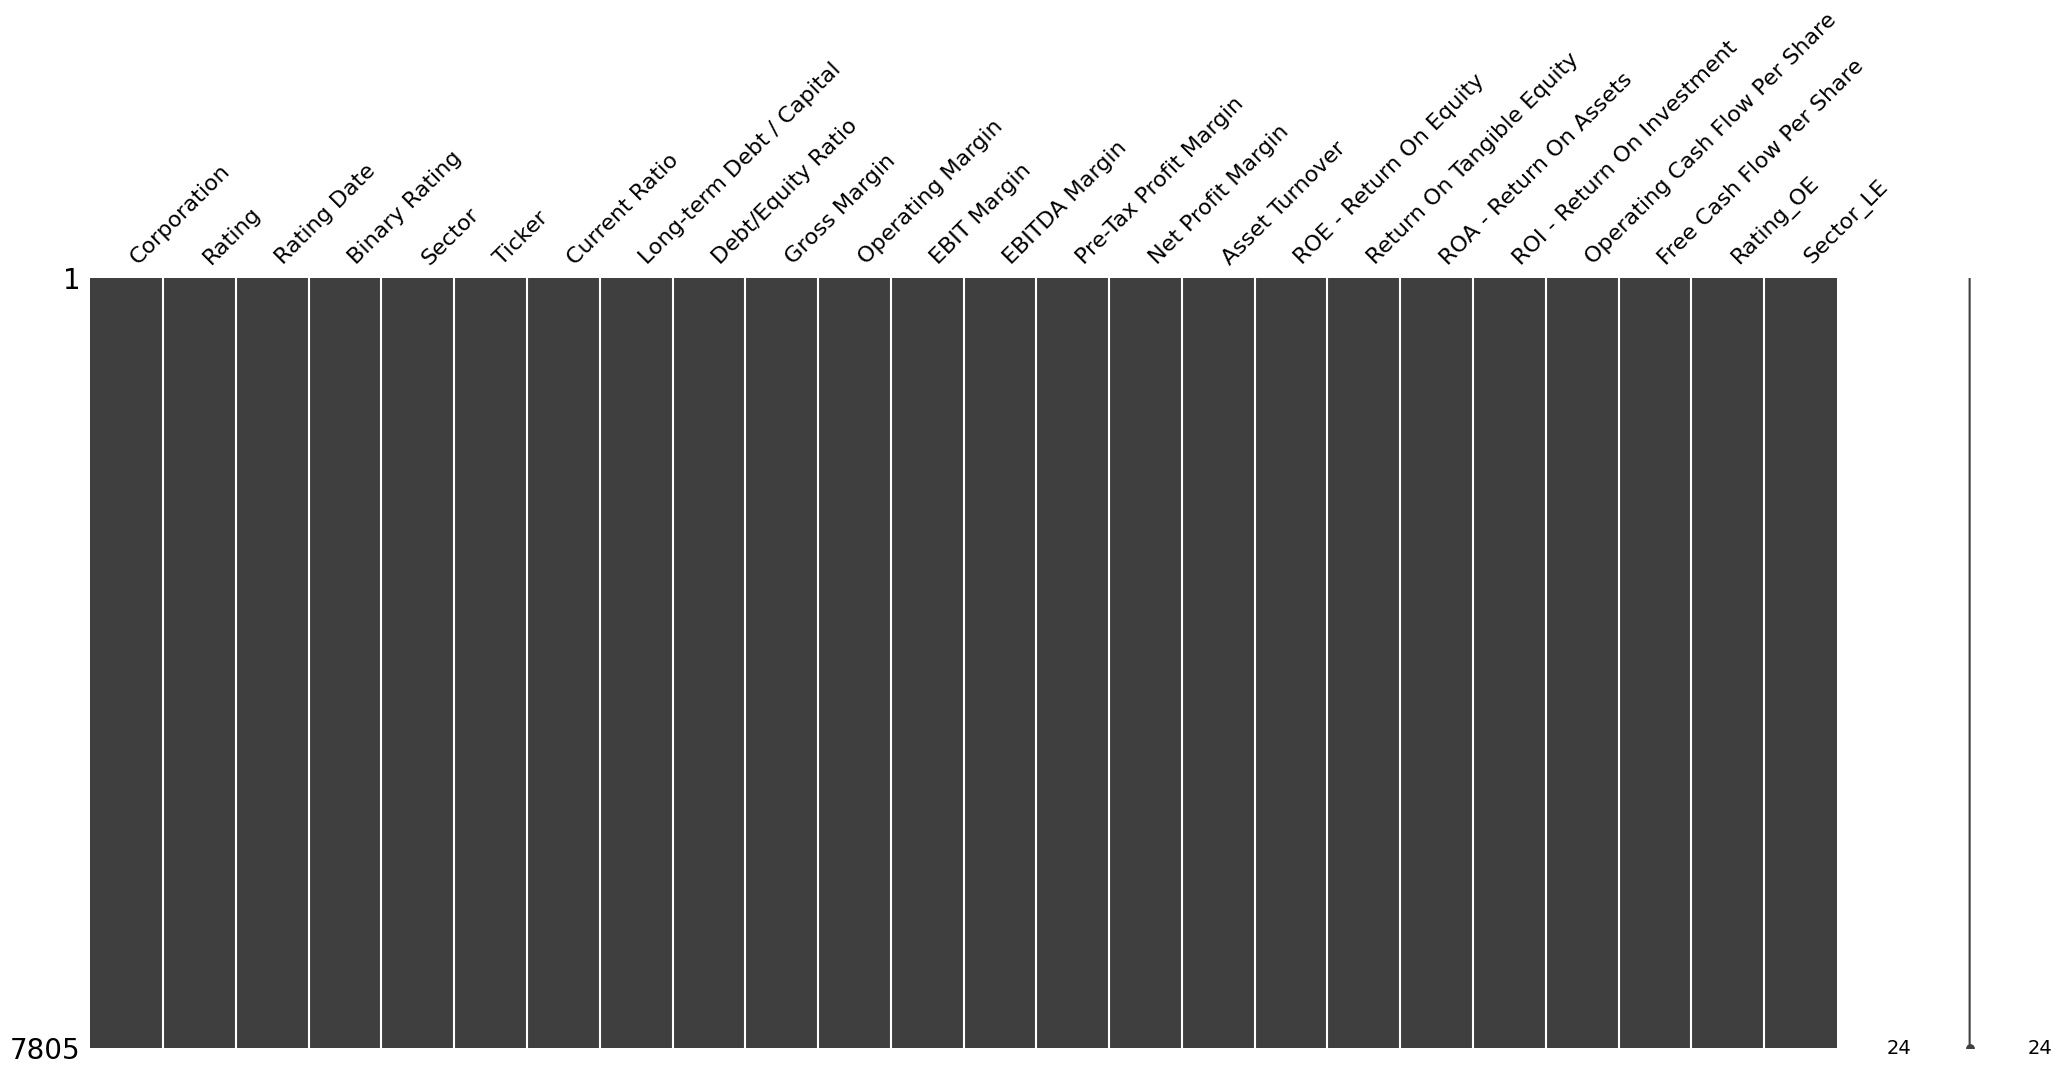

In [33]:
# Valores Faltantes.
msno.matrix(df)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Corporation                    7805 non-null   object 
 1   Rating                         7805 non-null   object 
 2   Rating Date                    7805 non-null   object 
 3   Binary Rating                  7805 non-null   int64  
 4   Sector                         7805 non-null   object 
 5   Ticker                         7805 non-null   object 
 6   Current Ratio                  7805 non-null   float64
 7   Long-term Debt / Capital       7805 non-null   float64
 8   Debt/Equity Ratio              7805 non-null   float64
 9   Gross Margin                   7805 non-null   float64
 10  Operating Margin               7805 non-null   float64
 11  EBIT Margin                    7805 non-null   float64
 12  EBITDA Margin                  7805 non-null   f

In [35]:
# Cambiamos Formato a Category para Identificar Variables Categóricas, ahorrar memoria y tener un procesamiento de datos más eficiente.
Columnas = ['Binary Rating', 'Rating_OE', 'Sector_LE']
def Cambio_Formato(df, Columnas):
    for i in Columnas:
        df[i] = df[i].astype('category')
    return df

df = Cambio_Formato(df, Columnas)

In [36]:
df['Corporation'] = df['Corporation'].astype('string')
df['Rating'] = df['Rating'].astype('string')
df['Sector'] = df['Sector'].astype('string')
df['Ticker'] = df['Ticker'].astype('string')

In [37]:
# Cambiamos el Formato de Fecha y Segmentamos por Intervalos.
# Año, Mes, Semana, Día de la Semana
df['Rating Date'] = pd.to_datetime(df['Rating Date'])
df['Year'] = df['Rating Date'].dt.year.astype('int64')
df['Month'] = df['Rating Date'].dt.month.astype('int64')
df['Week'] = df['Rating Date'].dt.isocalendar().week.astype('int64')
df['Day'] = df['Rating Date'].dt.day_of_week.astype('int64')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Corporation                    7805 non-null   string        
 1   Rating                         7805 non-null   string        
 2   Rating Date                    7805 non-null   datetime64[ns]
 3   Binary Rating                  7805 non-null   category      
 4   Sector                         7805 non-null   string        
 5   Ticker                         7805 non-null   string        
 6   Current Ratio                  7805 non-null   float64       
 7   Long-term Debt / Capital       7805 non-null   float64       
 8   Debt/Equity Ratio              7805 non-null   float64       
 9   Gross Margin                   7805 non-null   float64       
 10  Operating Margin               7805 non-null   float64       
 11  EBIT Margin      

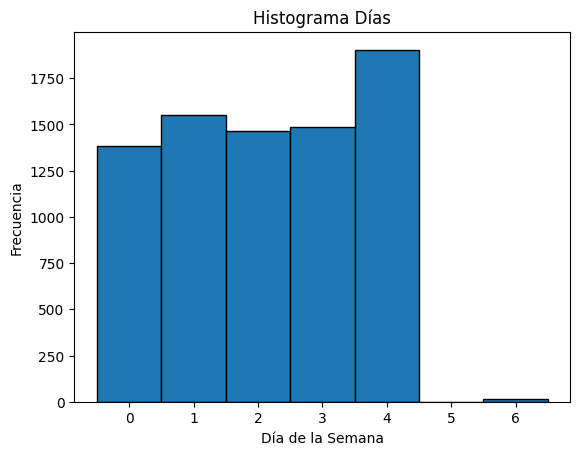

In [39]:
# Histograma Días.
plt.hist(df['Day'], bins=range(0,8), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Días')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [40]:
#Días Lunes
df[df['Day']==0]['Rating Date']

6      2010-12-20
49     2011-10-31
50     2011-07-25
52     2011-10-31
54     2011-09-12
          ...    
7778   2016-01-11
7787   2016-02-01
7790   2016-08-15
7798   2016-09-26
7800   2016-02-22
Name: Rating Date, Length: 1383, dtype: datetime64[ns]

In [41]:
#Días Sábado
df[df['Day']==5]['Rating Date']

5948   2015-09-19
Name: Rating Date, dtype: datetime64[ns]

In [42]:
# Días Domingo
df[df['Day']==6]['Rating Date']

351    2011-11-13
1517   2013-03-17
2811   2013-12-08
2880   2014-07-27
3058   2014-10-05
3333   2014-11-23
4345   2014-12-14
4561   2014-10-26
4649   2014-07-27
5358   2015-01-25
5834   2015-12-20
6432   2015-06-28
6945   2016-03-20
7058   2016-01-31
7687   2016-05-08
Name: Rating Date, dtype: datetime64[ns]

Es poco probable que se haya realizado la calificación de una Agencia un día Domingo, cuando la bolsa de EEUU está cerrada.

In [43]:
# Reemplazamos Sábado por Viernes y Domingo por Lunes.
df['Day'].replace({5: 4, 6: 1}, inplace=True)

C:\Users\220890\AppData\Local\Temp\ipykernel_22352\2811778136.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





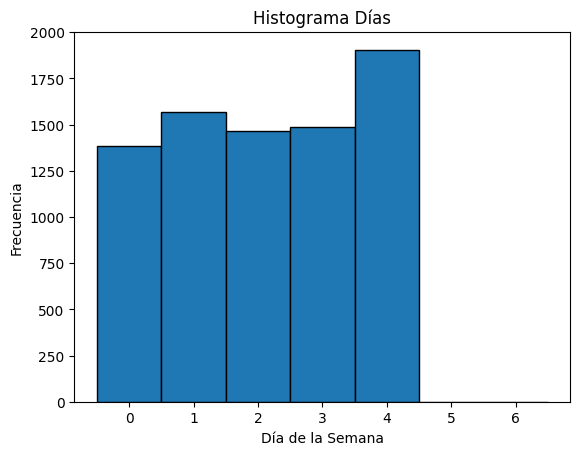

In [44]:
# Histograma Días.
plt.hist(df['Day'], bins=range(0,8), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Días')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

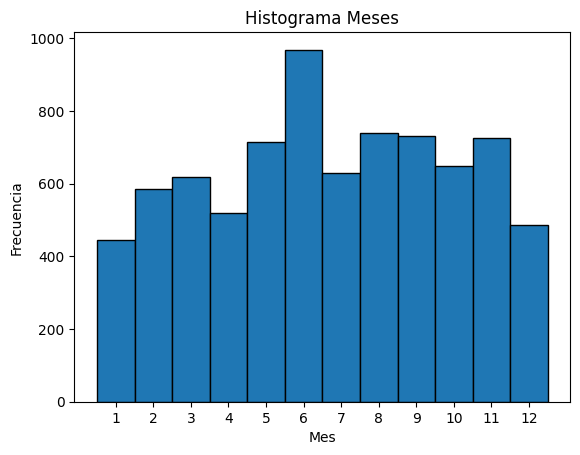

In [45]:
# Histograma Meses.
plt.hist(df['Month'], bins=range(1,14), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Meses')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 13))

# Mostrar el gráfico
plt.show()

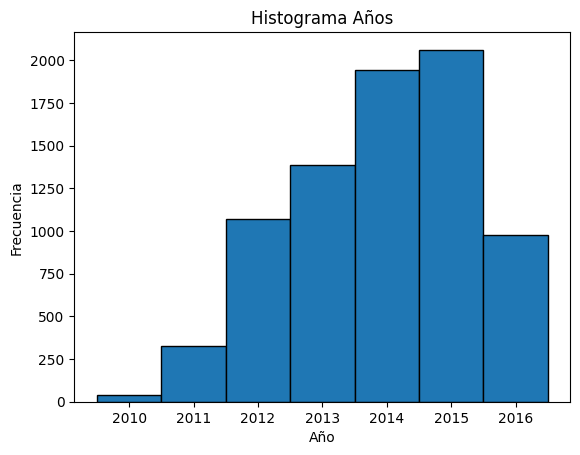

In [46]:
# Histograma Años.
plt.hist(df['Year'], bins=range(2010,2018), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [47]:
# Agrupamos la clasificación de una compañía para un mes y año en particular, para identificar si es que existe más de una clasificación en un mismo periodo contable.
df_grouped = df.groupby(['Year', 'Month', 'Corporation'])['Rating'].nunique()

In [48]:
df_grouped.describe().round(2)

count    7285.00
mean        1.02
std         0.13
min         1.00
25%         1.00
50%         1.00
75%         1.00
max         3.00
Name: Rating, dtype: float64

In [49]:
# Existen casos en los cuales tenemos 2 o 3 clasificaciones diferentes de una empresa para un mismo año, mes.
df_grouped.value_counts()

Rating
1    7156
2     127
3       2
Name: count, dtype: int64

In [50]:
# Agrupamos nuevamente, pero ahora considerando la fecha más antigua para un mismo mes y año, intentando tomar la fecha más cercana al fin del periodo contable. 
df = df.loc[df.groupby(['Year','Month','Corporation'])['Rating Date'].idxmax()]

In [51]:
# Se reduce el df de (7805, 28) a (7285, 28)
df.shape

(7285, 28)

In [52]:
# Valores Duplicados.
df.duplicated().sum()

0

In [53]:
df.describe().round(1)

,Rating Date,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,...,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Year,Month,Week,Day
count,7285,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,...,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0
mean,2014-06-02 21:31:09.430336256,1.9,0.5,0.2,42.5,11.5,11.5,20.0,8.6,6.0,...,15.1,20.0,4.6,7.0,0.5,0.1,2013.9,6.7,27.6,2.1
min,2010-04-06 00:00:00,0.2,-86.4,-1473.1,-87.7,-461.8,-461.8,-360.8,-476.0,-414.8,...,-11258.2,-14023.3,-226.4,-745.5,-91.3,-130.7,2010.0,1.0,1.0,0.0
25%,2013-07-22 00:00:00,1.1,0.3,0.4,22.5,6.1,6.1,11.1,4.0,2.6,...,6.0,-11.8,2.4,3.7,-0.4,-0.7,2013.0,4.0,17.0,1.0
50%,2014-07-22 00:00:00,1.5,0.4,0.8,39.6,12.1,12.1,18.3,9.7,6.9,...,12.5,10.6,4.7,7.4,0.2,0.1,2014.0,7.0,27.0,2.0
75%,2015-07-01 00:00:00,2.2,0.5,1.2,59.6,19.4,19.4,30.5,16.6,12.2,...,20.3,26.9,7.9,12.5,1.1,1.0,2015.0,9.0,39.0,3.0
max,2016-12-27 00:00:00,34.1,171.5,194.4,100.0,94.0,94.0,286.5,221.3,219.4,...,7038.5,9883.0,114.7,466.7,282.2,107.7,2016.0,12.0,53.0,4.0
std,NaN,1.9,2.7,34.4,23.7,25.2,25.2,24.3,27.7,24.0,...,233.1,455.4,9.3,25.0,6.2,7.4,1.4,3.2,14.0,1.4


In [54]:
df.describe(include='category')

,Binary Rating,Rating_OE,Sector_LE
count,7285,7285,7285
unique,2,7,11
top,1,4,2
freq,4749,1495,1268


In [55]:
df.describe(include='string')

,Corporation,Rating,Sector,Ticker
count,7285,7285,7285,7285
unique,1377,7,11,678
top,Chevron Corporation,Media Inferior,Consumer Staples,DTE
freq,20,1495,1268,40


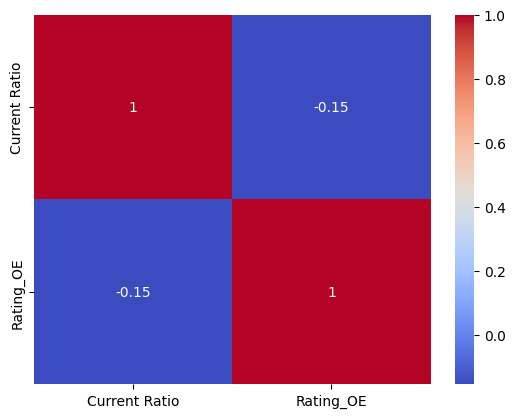

In [56]:
# Correlación Ratio de Liquidez con Variable Objetivo.
columns = df[['Current Ratio', 'Rating_OE']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

Existe cierto Grado de Correlación Negativa entre 'Current Ratio', 'Rating_OE'.

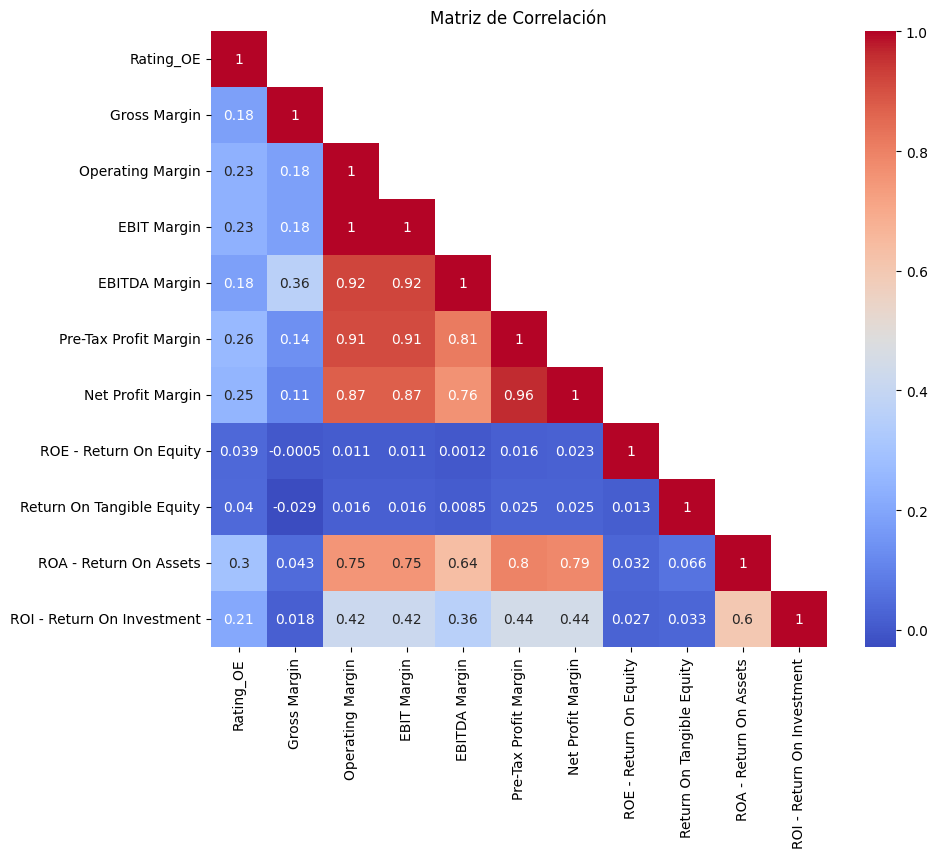

In [84]:
# Correlación Ratios de Rentabilidad con Variable Objetivo.
df_margin = df[['Rating_OE','Gross Margin', 'Operating Margin', 'EBIT Margin', 'EBITDA Margin', 'Pre-Tax Profit Margin', 'Net Profit Margin', 
               'ROE - Return On Equity', 'Return On Tangible Equity', 'ROA - Return On Assets', 'ROI - Return On Investment']]
matriz_corr = df_margin.corr()
mask = np.triu(np.ones_like(matriz_corr, dtype=bool), k=1)

# Gráfico de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', mask=mask, square=True)
plt.title('Matriz de Correlación')
plt.show()

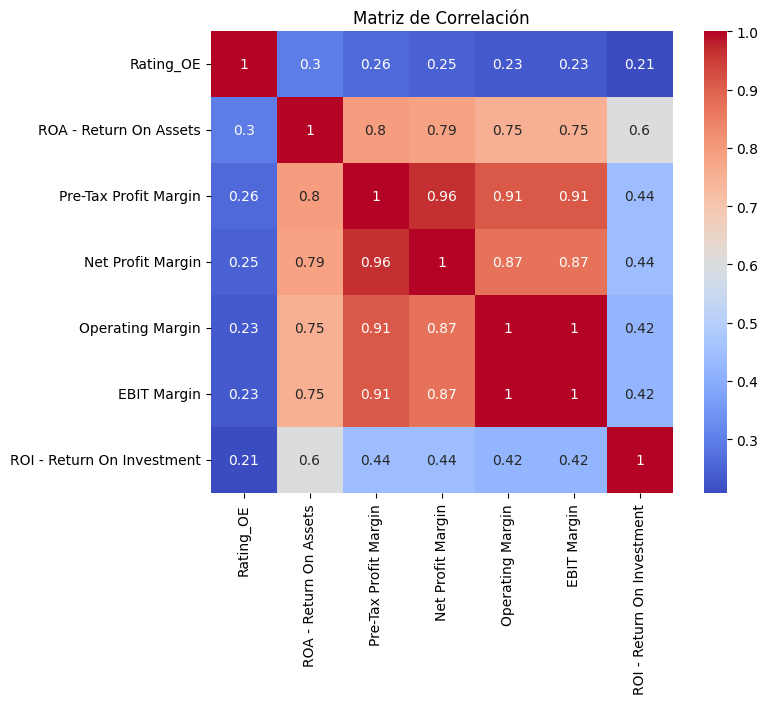

In [85]:
# Correlación Ratios de Rentabilidad con Variable Objetivo.
df_margin = df[['Rating_OE', 'ROA - Return On Assets', 'Pre-Tax Profit Margin', 'Net Profit Margin', 'Operating Margin', 'EBIT Margin', 'ROI - Return On Investment']]
matriz_corr = df_margin.corr()

# Gráfico de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

Seleccionamos solo las variables que tengan Mayor correlación con la Variable Objetivo y al mismo tiempo tengan menor grado de correlación entre ellas, dejando seleccionadas únicamente 'ROA - Return On Assets' y 'ROI - Return On Investment'.

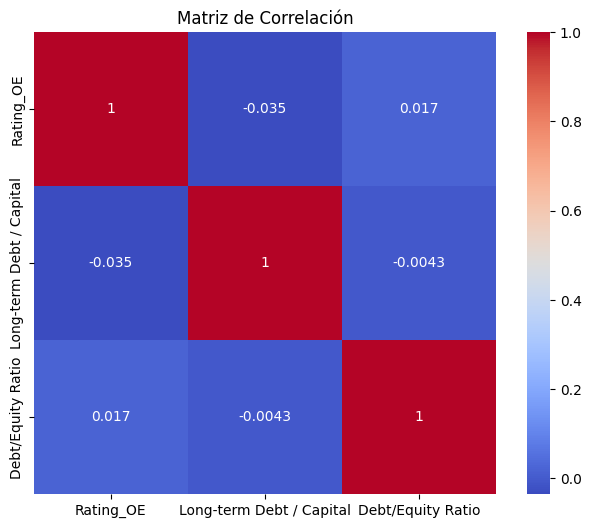

In [90]:
# Correlación Ratios de Deuda con Variable Objetivo.
df_margin = df[['Rating_OE', 'Long-term Debt / Capital','Debt/Equity Ratio']]
matriz_corr = df_margin.corr()

# Gráfico de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

No existe ningún Grado de Correlación entre Ratios de Deuda y la Variable Objetivo, ni tampoco entre Ratios de Deuda.

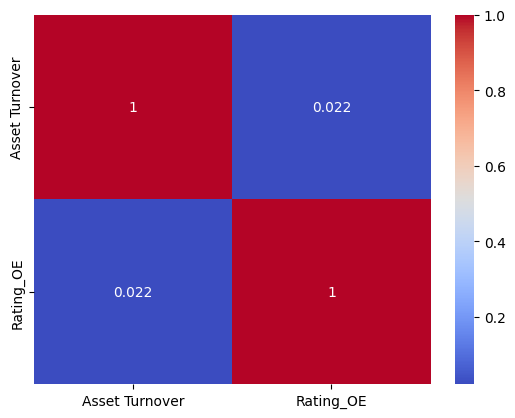

In [91]:
# Correlación Ratio de Desempeño Operacional con Variable Objetivo.
columns = df[['Asset Turnover', 'Rating_OE']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

No existe Grado de Correlación entre 'Asset Turnover' y la Varible Objetivo.

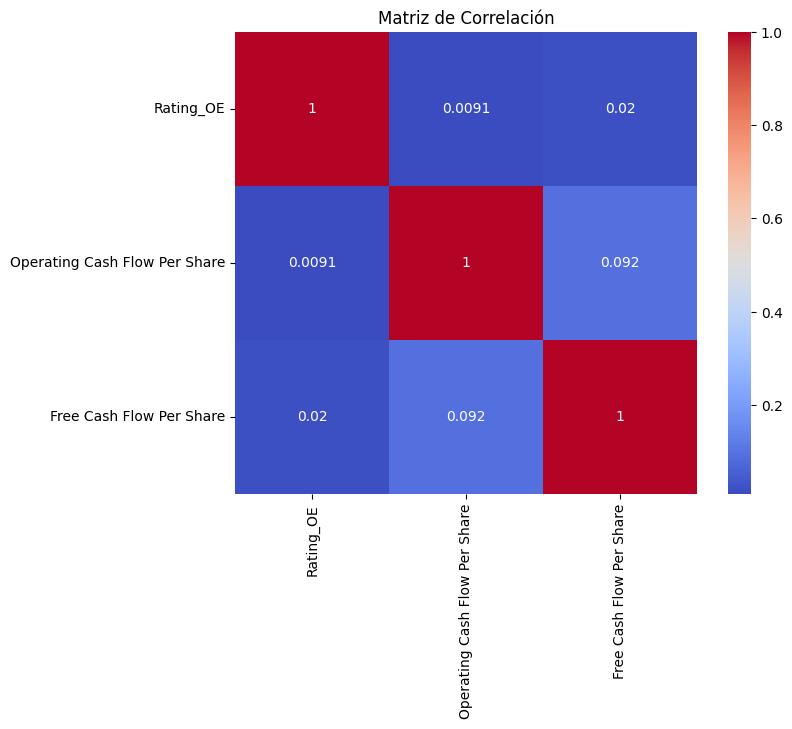

In [92]:
# Correlación Ratios de Flujo de Caja con Variable Objetivo.
df_margin = df[['Rating_OE', 'Operating Cash Flow Per Share','Free Cash Flow Per Share']]
matriz_corr = df_margin.corr()

# Gráfico de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

No existe ningún Grado de Correlación entre Ratios de Flujo de Caja y la Variable Objetivo, ni tampoco entre Ratios.

5.2 Valores Atípicos, Outliers.

In [94]:
df[['Current Ratio', 'ROA - Return On Assets', 'ROI - Return On Investment']].describe().round(1)

,Current Ratio,ROA - Return On Assets,ROI - Return On Investment
count,7285.0,7285.0,7285.0
mean,1.9,4.6,7.0
std,1.9,9.3,25.0
min,0.2,-226.4,-745.5
25%,1.1,2.4,3.7
50%,1.5,4.7,7.4
75%,2.2,7.9,12.5
max,34.1,114.7,466.7


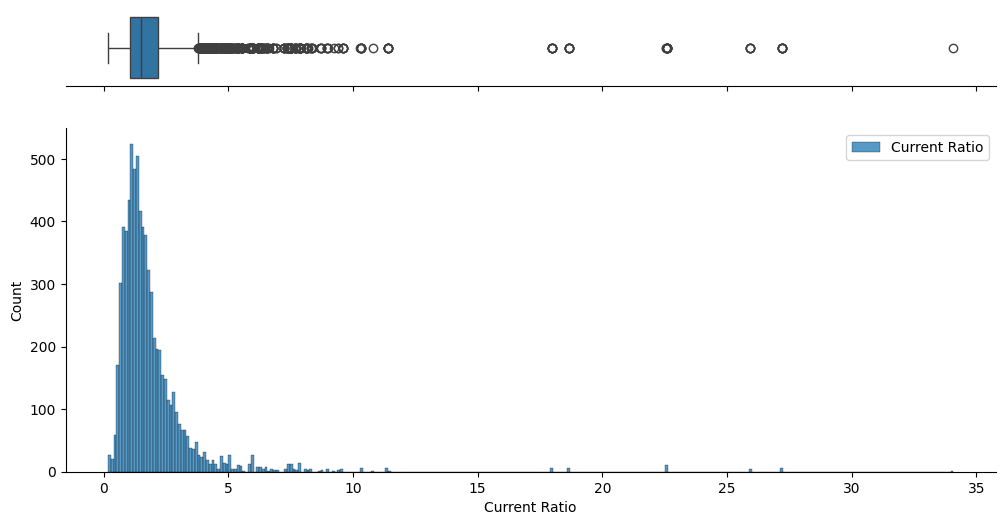

In [57]:
# Box Plot 1
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Current Ratio'], ax=ax_box, orient="h") 
sns.histplot(df['Current Ratio'], ax=ax_hist, label='Current Ratio')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

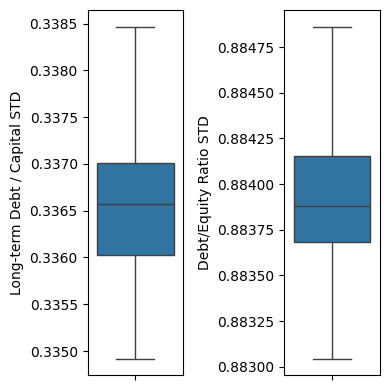

In [58]:
# Box Plot 2
# Estandarizamos las variables para no desvirtuar el gráfico, considerando los diferentes órdenes de magnitud.
# Dejamos los valores atípicos fuera del gráfico para mejorar la visualización.

from sklearn.preprocessing import MinMaxScaler

df['Long-term Debt / Capital STD'] = df['Long-term Debt / Capital']
df['Debt/Equity Ratio STD'] = df['Debt/Equity Ratio']

variables = ['Long-term Debt / Capital STD', 'Debt/Equity Ratio STD']

scaler = MinMaxScaler()
df[variables] = scaler.fit_transform(df[variables])

fig, axes = plt.subplots(1, len(variables), figsize=(4,4))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax, showfliers=False)
plt.tight_layout()
plt.show()

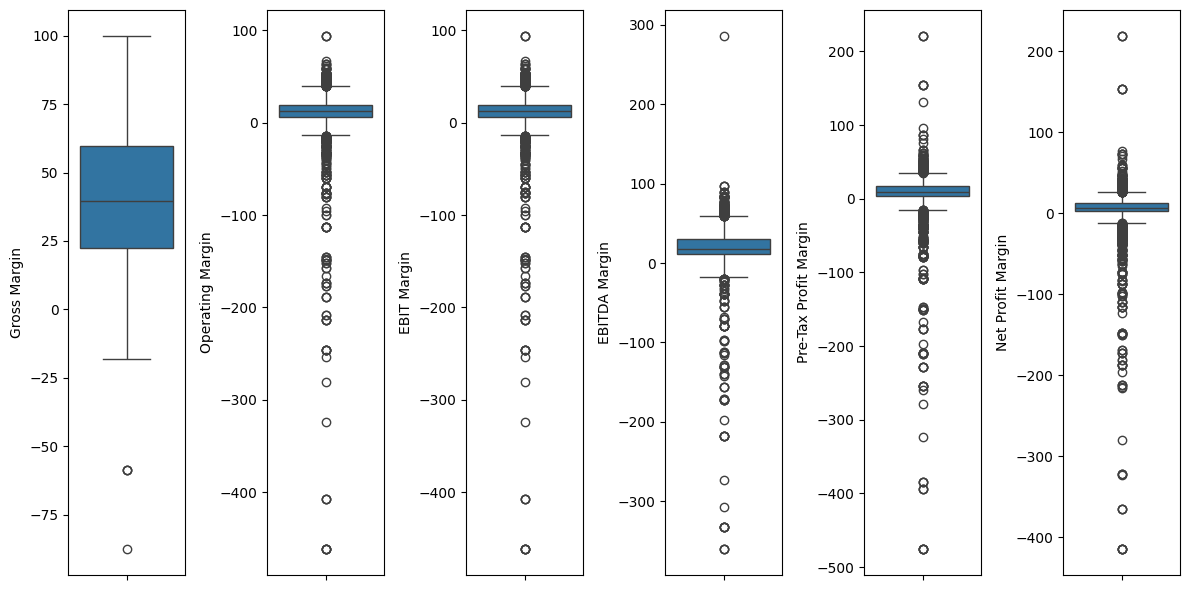

In [59]:
# Box Plot 3
variables = ['Gross Margin', 'Operating Margin', 'EBIT Margin', 'EBITDA Margin', 'Pre-Tax Profit Margin', 'Net Profit Margin']

fig, axes = plt.subplots(1, len(variables), figsize=(12,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax)
plt.tight_layout()

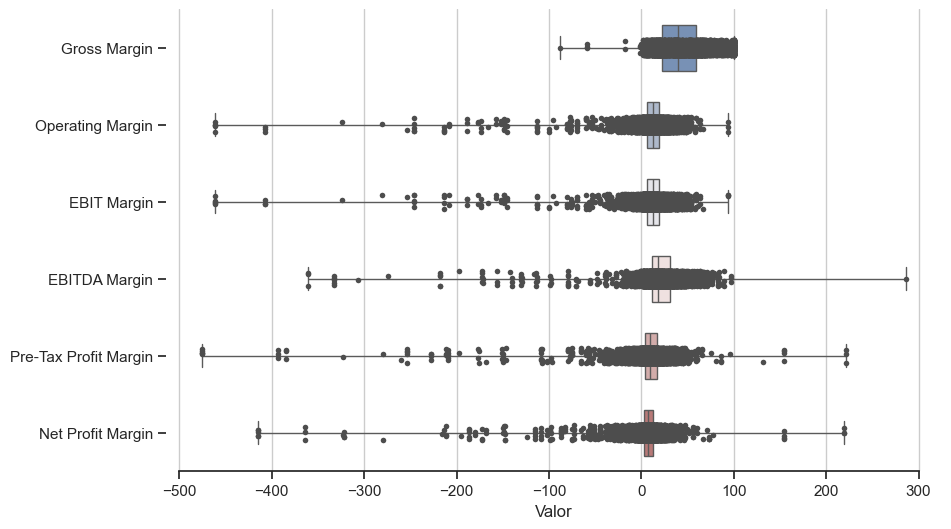

In [60]:
sns.set_theme(style='ticks')

f, ax = plt.subplots(figsize=(10,6))
#ax.set_xscale('log')

margins = ['Gross Margin', 'Operating Margin', 'EBIT Margin', 'EBITDA Margin', 'Pre-Tax Profit Margin', 'Net Profit Margin']

df_melted = df[margins].melt(var_name='Margen', value_name='Valor')

sns.boxplot(data=df_melted, x='Valor', y='Margen', hue='Margen', whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(data=df_melted, x='Valor', y='Margen', size=4, color=".3")

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.show()

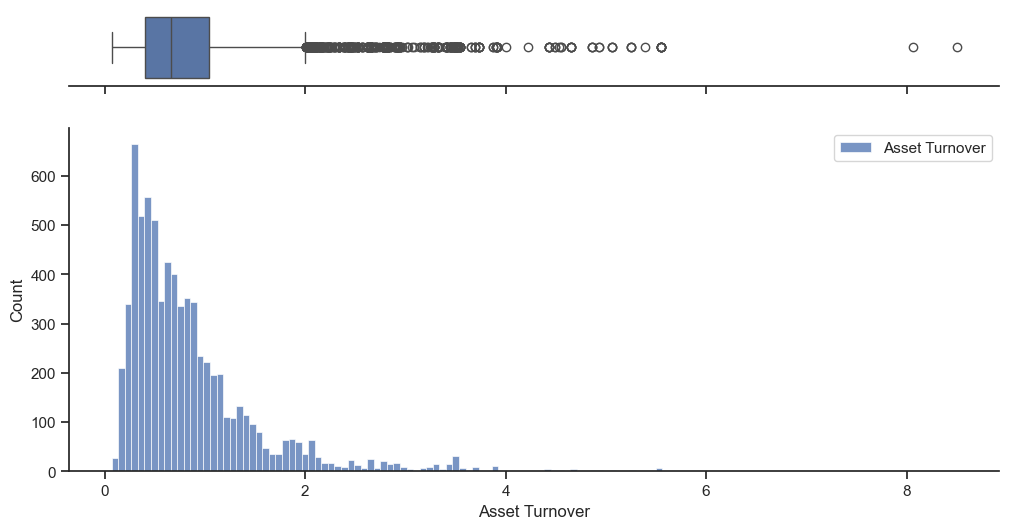

In [61]:
# Box Plot 4
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.20, .9)})
sns.boxplot(df['Asset Turnover'], ax=ax_box, orient="h") 
sns.histplot(df['Asset Turnover'], ax=ax_hist, label='Asset Turnover')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

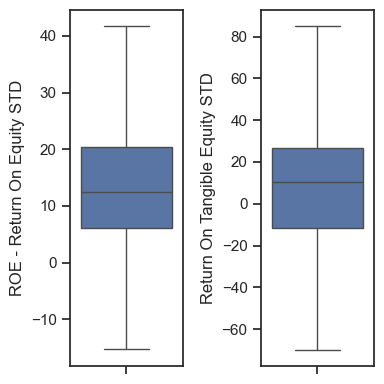

In [62]:
# Box Plot 5
# Estandarizamos las variables para no desvirtuar el gráfico, considerando los diferentes órdenes de magnitud.
# Dejamos los valores atípicos fuera del gráfico para mejorar la visualización.

df['ROE - Return On Equity STD'] = df['ROE - Return On Equity']
df['Return On Tangible Equity STD'] = df['Return On Tangible Equity']

variables = ['ROE - Return On Equity STD', 'Return On Tangible Equity STD']

fig, axes = plt.subplots(1, len(variables), figsize=(4,4))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax, showfliers=False)
plt.tight_layout()

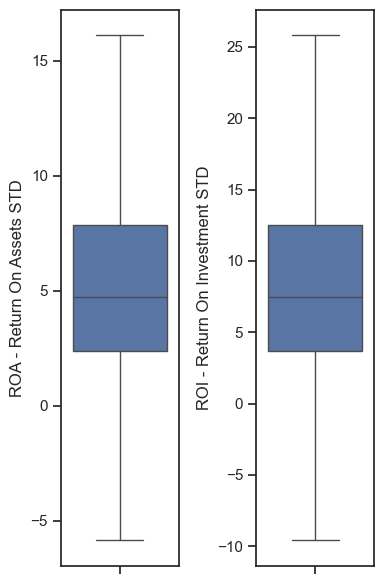

In [63]:
# Box Plot 6
# Estandarizamos las variables para no desvirtuar el gráfico, considerando los diferentes órdenes de magnitud.
# Dejamos los valores atípicos fuera del gráfico para mejorar la visualización.

df['ROA - Return On Assets STD'] = df['ROA - Return On Assets']
df['ROI - Return On Investment STD'] = df['ROI - Return On Investment']

variables = ['ROA - Return On Assets STD', 'ROI - Return On Investment STD']

fig, axes = plt.subplots(1, len(variables), figsize=(4,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax, showfliers=False)
plt.tight_layout()

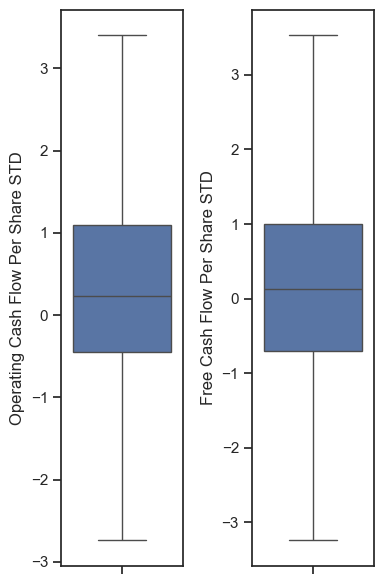

In [64]:
# Box Plot 7
# Estandarizamos las variables para no desvirtuar el gráfico, considerando los diferentes órdenes de magnitud.
# Dejamos los valores atípicos fuera del gráfico para mejorar la visualización.

df['Operating Cash Flow Per Share STD'] = df['Operating Cash Flow Per Share']
df['Free Cash Flow Per Share STD'] = df['Free Cash Flow Per Share']

variables = ['Operating Cash Flow Per Share STD', 'Free Cash Flow Per Share STD']

fig, axes = plt.subplots(1, len(variables), figsize=(4,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax, showfliers=False)
plt.tight_layout()

5.3 Correlación de Pearson.

In [65]:
columns_float64 = df.select_dtypes(include='float64').columns

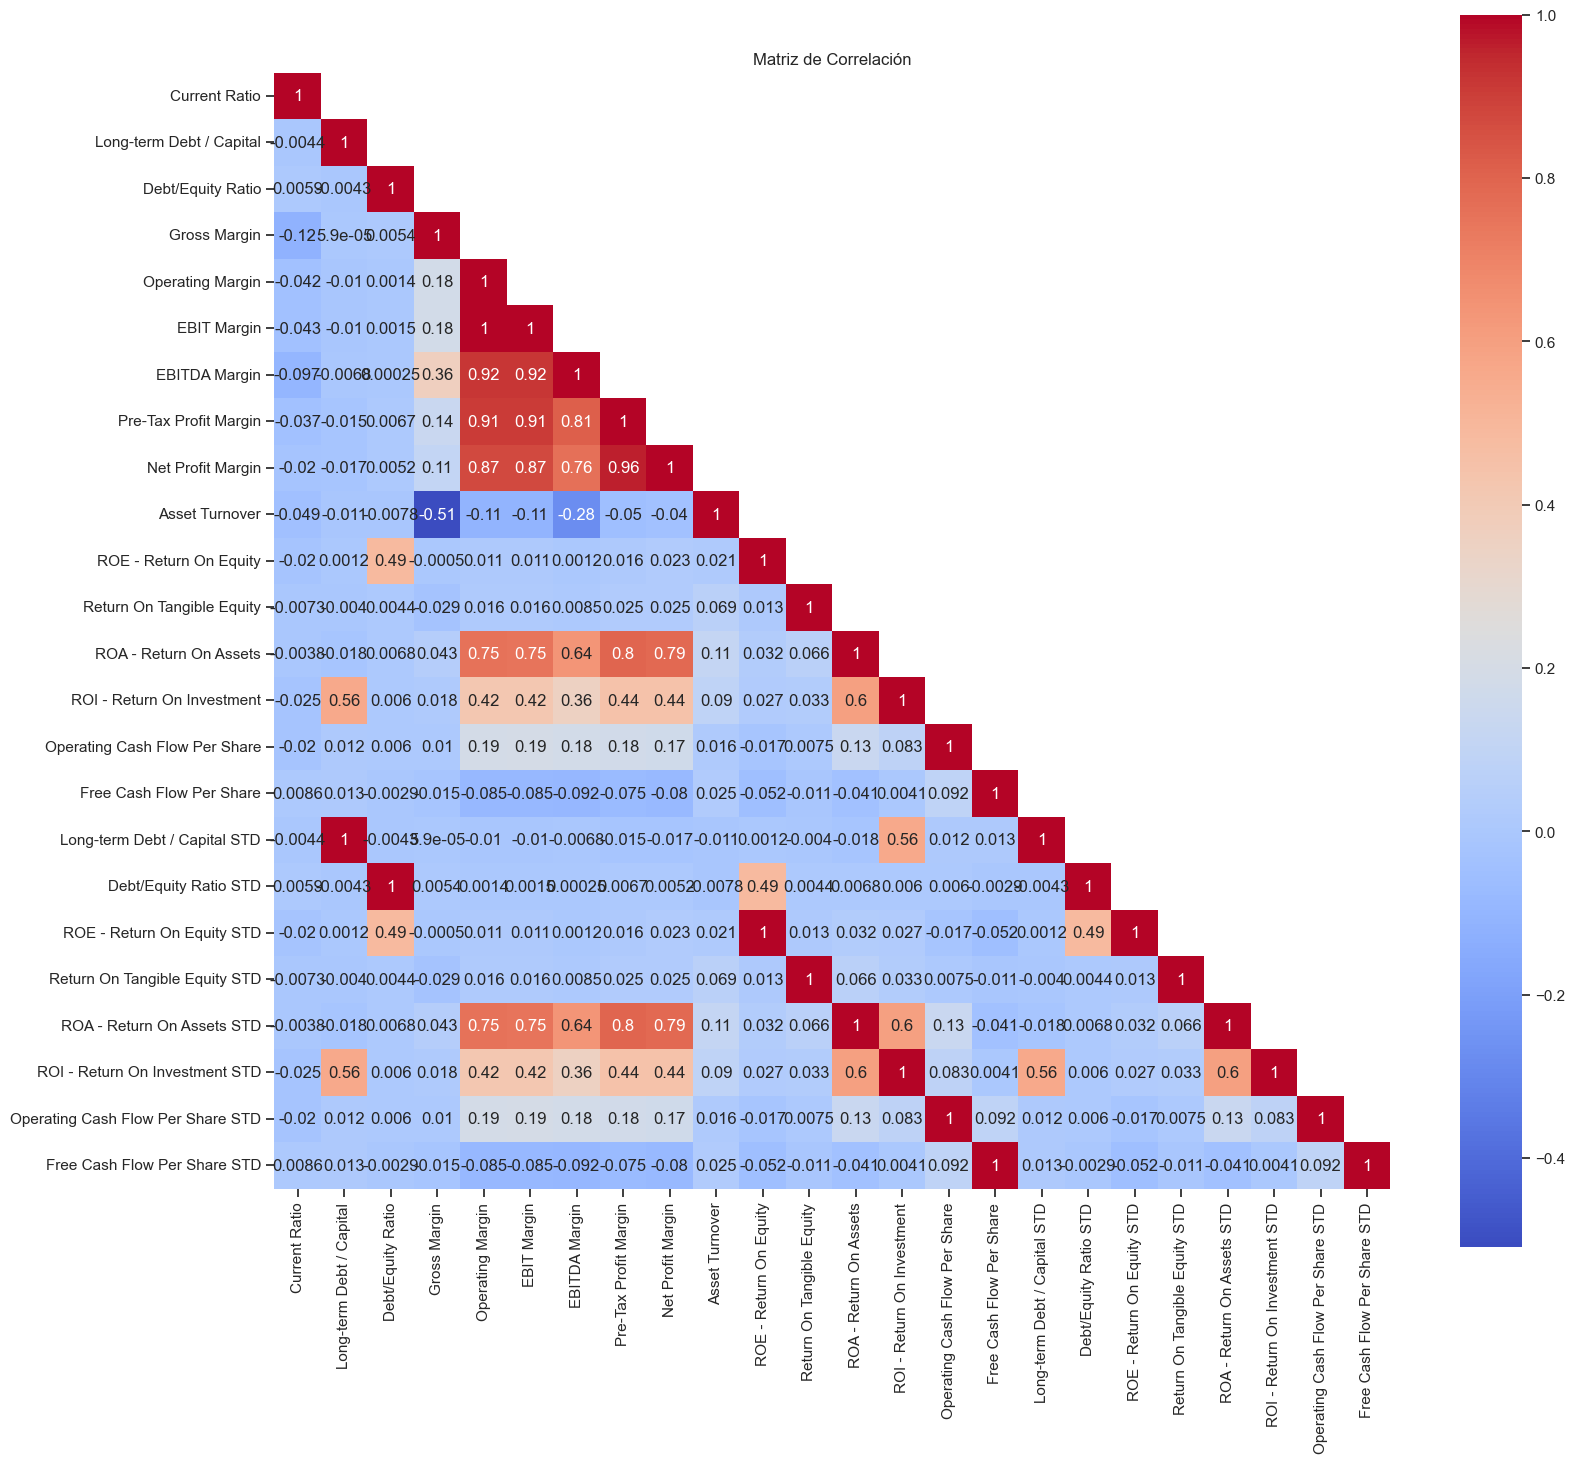

In [66]:
# Correlación Entre Variables.
df_float64 = df[columns_float64]
matriz_corr = df_float64.corr()
mask = np.triu(np.ones_like(matriz_corr, dtype=bool), k=1)

# Gráfico de correlación
plt.figure(figsize=(18, 16))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', mask=mask, square=True)
plt.title('Matriz de Correlación')
plt.show()

6. Data Wrangling (Munging)

6.1 Tratamiento de Valores Atípicos

6.2 Estandarización Variables

7. Selección del Algoritmo

8. Desarrollo del Algoritmo

9. Validación y Despliegue

10. Conclusiones y Recomendaciones